**STAT130 HOMEWORK THREE**
EVELYN JIN

**PART ONE: PRELECTURE**

In [20]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Filter dataset by species
species_list = penguins['species'].dropna().unique()

# Create a subplot for histograms of each species
fig = make_subplots(rows=len(species_list), cols=1, shared_xaxes=True, 
                    subplot_titles=species_list, vertical_spacing=0.1)

for i, species in enumerate(species_list):
    # Filter for each species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()

    # Calculate the statistics
    mean = species_data.mean()
    median = species_data.median()
    std_dev = species_data.std()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)

    # Create histogram for the species
    hist = go.Histogram(x=species_data, name=f'{species} Flipper Length',
                        histnorm='probability', opacity=0.75)

    # Add histogram to subplot
    fig.add_trace(hist, row=i+1, col=1)
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color="blue", dash="dash"), row=i+1, col=1, annotation_text="Mean", annotation_position="top left", 
                  name="Mean")
    fig.add_vline(x=median, line=dict(color="green", dash="dash"), row=i+1, col=1, annotation_text="Median", annotation_position="top right", 
                  name="Median")
    
    # Add rectangles for range, interquartile range, and ±2 standard deviations
    fig.add_vrect(x0=min_val, x1=max_val, line_width=0, fillcolor="lightgray", opacity=0.3, row=i+1, col=1, 
                  annotation_text="Range", annotation_position="bottom left", name="Range")
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="orange", opacity=0.3, row=i+1, col=1, 
                  annotation_text="IQR", annotation_position="bottom left", name="IQR")
    fig.add_vrect(x0=mean - 2*std_dev, x1=mean + 2*std_dev, line_width=0, fillcolor="yellow", opacity=0.2, row=i+1, col=1, 
                  annotation_text="±2 SD", annotation_position="top left", name="±2 SD")

# Update layout for clarity
fig.update_layout(height=900, width=700, 
                  title_text="Flipper Length Distributions by Species (with Marked Stats)", 
                  showlegend=True, 
                  legend_title="Statistical Markers")

# Show the figure
fig.show()


**PART TWO: PRELECTURE**

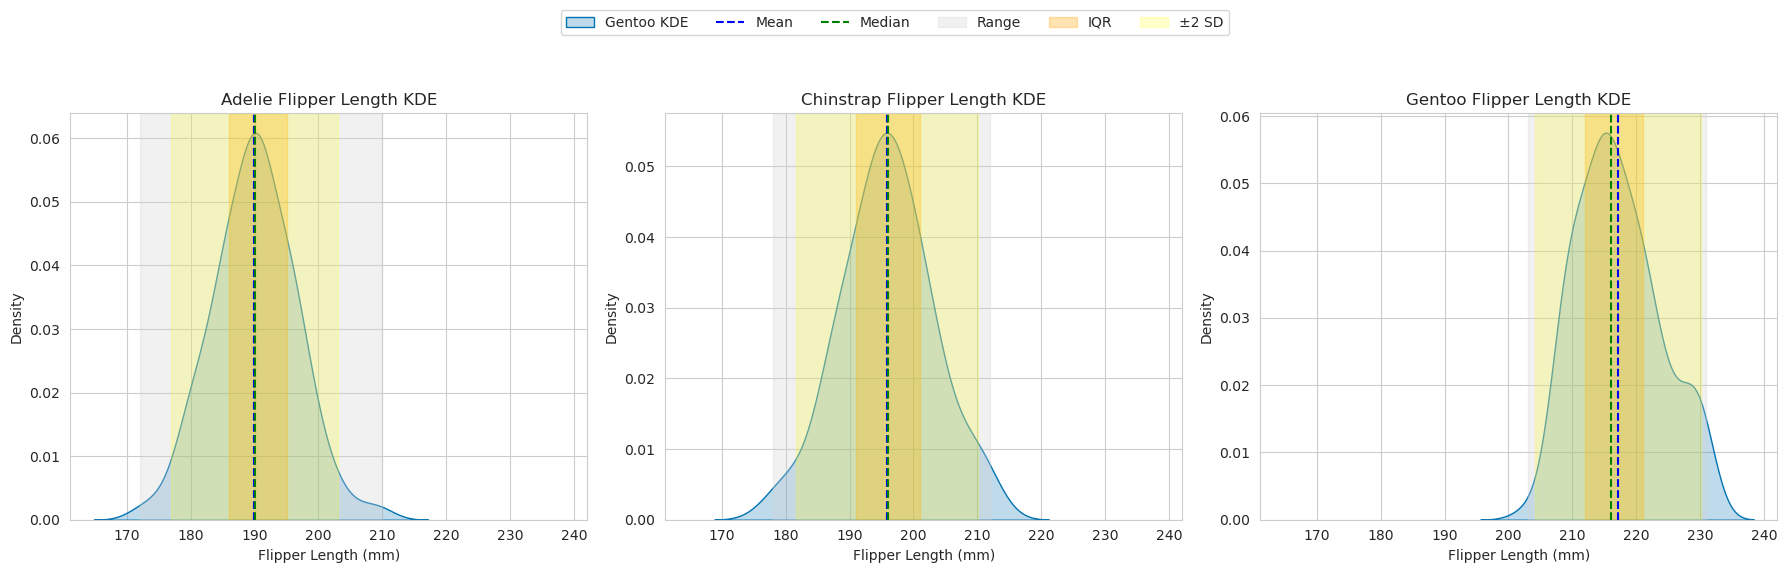

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Set a theme for aesthetics
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Filter dataset by species
species_list = penguins['species'].dropna().unique()

# Create a figure with 3 rows of KDE plots, one for each species
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharex=True)

# Loop over each species and create a KDE plot
for i, species in enumerate(species_list):
    ax = axes[i]
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()

    # Plot KDE
    sns.kdeplot(species_data, ax=ax, fill=True, label=f'{species} KDE', bw_adjust=1)

    # Calculate the statistics
    mean = species_data.mean()
    median = species_data.median()
    std_dev = species_data.std()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)

    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='--', label='Median')

    # Add filled areas for range, IQR, and ±2 SD
    ax.axvspan(min_val, max_val, color='lightgray', alpha=0.3, label='Range')
    ax.axvspan(q1, q3, color='orange', alpha=0.3, label='IQR')
    ax.axvspan(mean - 2*std_dev, mean + 2*std_dev, color='yellow', alpha=0.2, label='±2 SD')

    # Set titles and labels
    ax.set_title(f'{species} Flipper Length KDE')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

# Adjust the layout and add a legend outside the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.15))

# Display the plot
plt.tight_layout()
plt.show()


**PART THREE: PRELECTURE**

chatbot history log: https://chatgpt.com/share/66f1acdf-9fd0-800a-8546-a865c5b18b3f

**PART FOUR: PRELECTURE**

In [8]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**4.1 Which datasets have similar means and similar variances?**

Data 2 and Data 4: Both distributions are centered around means of 5 and 6, respectively, with relatively small variances compared to Data 1 and Data 3.

**4.2 Which datasets have similar means but quite different variances?**

Data 1 and Data 2: Both have means close to 5, but Data 1 has a much larger variance (8.33) compared to Data 2 (2.25).

**4.3 Which datasets have similar variances but quite different means?**

Data 2 and Data 4: Both have relatively small variances (2.25 and 0.25), but their means differ significantly (5 for Data 2 and 6 for Data 4).

**4.4 Which datasets have quite different means and quite different variances?**

Data 1 and Data 4: Data 1 has a mean of 5 with a large variance (8.33), while Data 4 has a mean of 6 with a much smaller variance (0.25).

**PART FIVE: POST LECTURE**

The relationship between the mean and median and distribution skews depend on the values and their "extremeness." Right-skewed distributions have the mean greater than the median while left-skewed distributions have the mean less than the median. This is because the mean is sensitive to extreme values (outliers), while the median is more robust, reflecting the central position in the data.

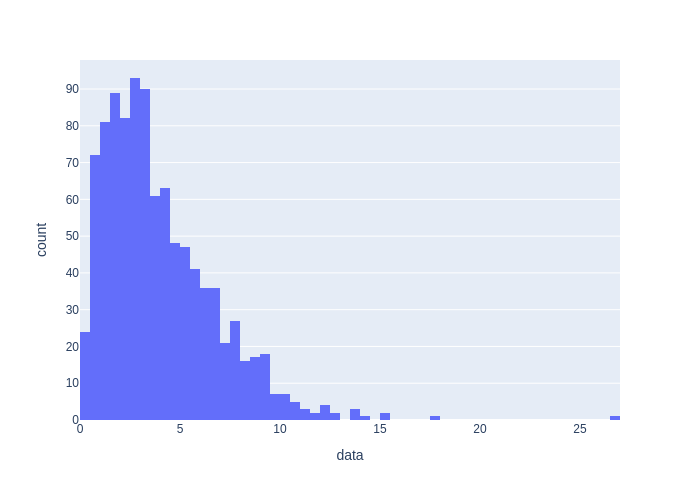

(3.9889784571526694,
 3.328974501156455,
 -3.8125720261414218,
 -3.1483549763853693,
 None)

In [22]:
# Let's begin by analyzing the code and running it to see its outputs and behavior.

from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate a right-skewed distribution sample from a gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
# Create a histogram of the data sample
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

# Calculate the mean and median of the first sample
sample1_mean = sample1.mean()
sample1_median = np.quantile(sample1, [0.5])[0]

# Generate a left-skewed distribution sample by negating a gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Calculate the mean and median of the second sample
sample2_mean = sample2.mean()
sample2_median = np.quantile(sample2, [0.5])[0]

sample1_mean, sample1_median, sample2_mean, sample2_median, fig1.show(renderer="png")


**Right Skew (Gamma)**

**Mean:** 4.02	

**Median:** 3.32

The mean (4.02) is greater than the median (3.32). This occurs because the right tail (with larger values) pulls the mean higher, while the median remains closer to the center of the data.


**Left Skew (-Gamma)**

**Mean:** -3.99	

**Median:** -3.33

The mean (-3.99) is less than the median (-3.33). Here, the left tail (with smaller values) drags the mean down, while the median stays more central.

This code first imports the necessary libraries such as `scipy.stats` (provides statistical distributions and functions) or `numpy` (which provides functions for numerical operations such as quantile calculation). 

It then generates a right-skewed distribution (`sample1`) where for example, `.rvs(size=1000)` creates a random sample of size 1000 from this distribution, storing it in the variable `sample1`. 

Then, it creates a histogram (`fig1`), which is generated using `plotly.express` to visualize the distribution. The code also calculates the mean of the distribution, which provides a measure that takes outliers into account, and 
calculates the median of the distribution, which gives us the the middle value of the data distribution. This is important because the median is less affected by extreme values compared to the mean.

Finally, the code generates a left-skewed distribution (`sample2`) where `-stats.gamma(a=2, scale=2).rvs(size=1000)` creates a new sample from a right-skewed Gamma distribution and then negates it to flip it into a left-skewed distribution.

**PART SIX: POST LECTURE**

In [35]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [36]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

       restaurant id  category id    item id  serving size (oz)     calories  \
count     750.000000   750.000000  750.00000         395.000000   750.000000   
mean     2126.666667   113.685333  374.50000          10.612996   296.149333   
std       897.234043     9.956229  216.65064           7.286159   209.034366   
min      1000.000000   100.000000    0.00000           0.035274     0.000000   
25%      1000.000000   106.000000  187.25000           5.200000   150.000000   
50%      2000.000000   111.000000  374.50000          10.158912   260.000000   
75%      3000.000000   123.000000  561.75000          16.000000   410.000000   
max      3000.000000   130.000000  749.00000          32.000000  1880.000000   

       calories from fat  total fat (% daily value)  saturated fat (g)  \
count         260.000000                 260.000000         637.000000   
mean          127.096154                  21.815385           3.409105   
std           127.875914                  21.885199      

DataFrame Columns:
Index(['restaurant id', 'category id', 'item id', 'serving size (oz)',
       'calories', 'calories from fat', 'total fat (g)',
       'total fat (% daily value)', 'saturated fat (g)',
       'saturated fat (% daily value)', 'trans fat (g)', 'cholesterol (mg)',
       'cholesterol (% daily value)', 'sodium (mg)', 'sodium (% daily value)',
       'carbohydrates (g)', 'carbohydrates (% daily value)',
       'dietary fiber (g)', 'dietary fiber (% daily value)', 'sugars (g)',
       'protein (g)', 'vitamin a (% daily value)', 'vitamin c (% daily value)',
       'calcium (% daily value)', 'iron (% daily value)'],
      dtype='object')

DataFrame Head:
   restaurant id  category id  item id  serving size (oz)  calories  \
0           1000          100        0                4.8       300   
1           1000          100        1                4.8       250   
2           1000          100        2                3.9       370   
3           1000          100        3    

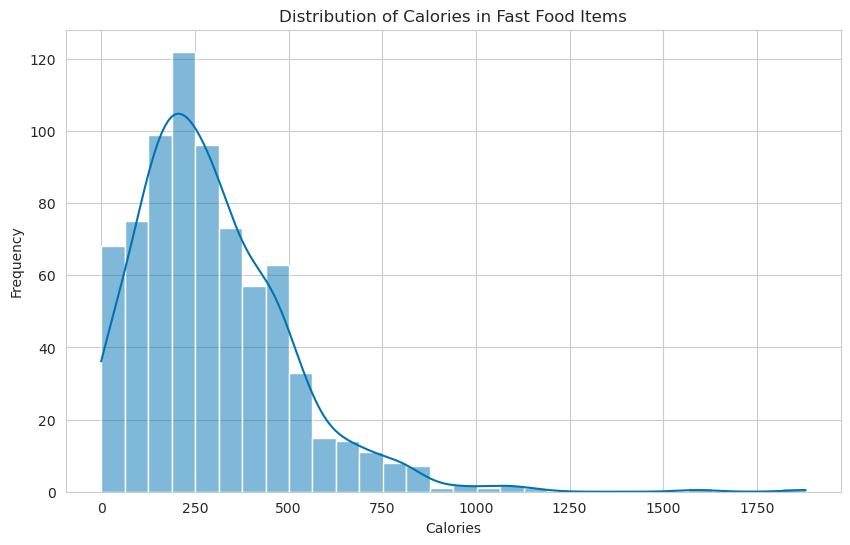

Missing columns: ['total_fat', 'sodium', 'protein']


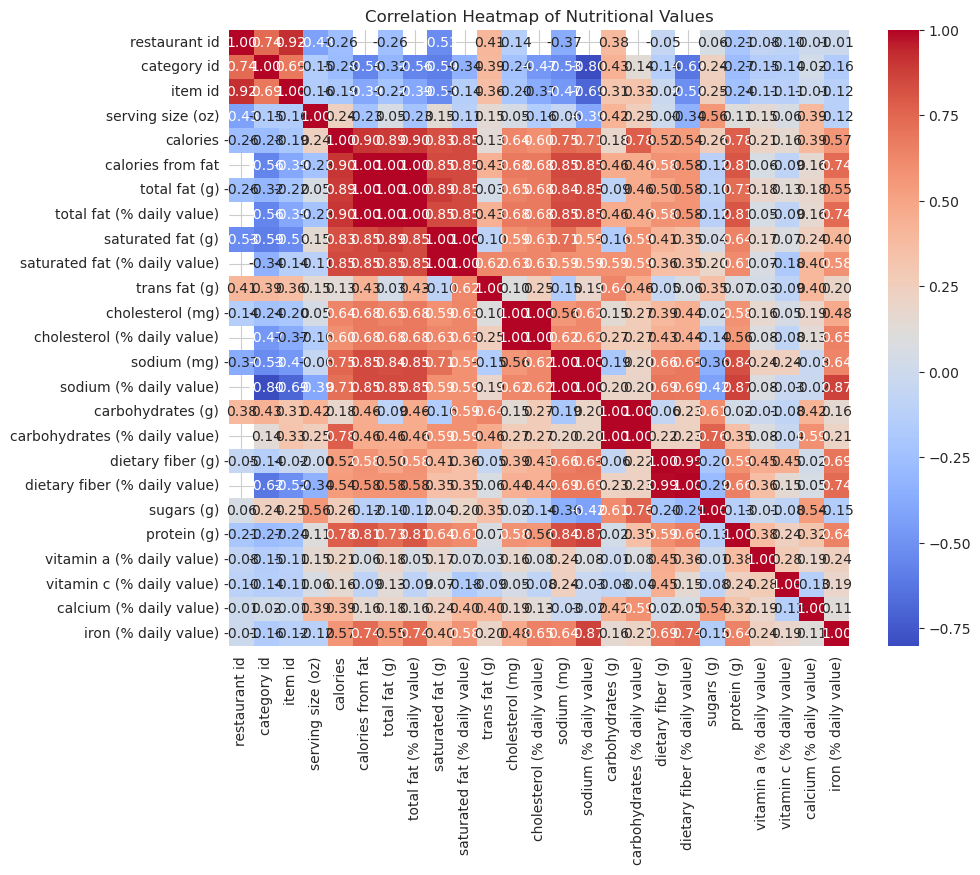

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Check the structure of the DataFrame
print("DataFrame Columns:")
print(df.columns)

# Verify the first few rows of the DataFrame
print("\nDataFrame Head:")
print(df.head())

# Histogram of calories
plt.figure(figsize=(10, 6))
if 'calories' in df.columns:
    sns.histplot(df['calories'], bins=30, kde=True)
    plt.title('Distribution of Calories in Fast Food Items')
    plt.xlabel('Calories')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The 'calories' column is missing from the DataFrame.")

# Boxplot of nutritional values
nutritional_columns = ['calories', 'total_fat', 'sodium', 'protein']

# Check if columns exist in the DataFrame
missing_columns = [col for col in nutritional_columns if col not in df.columns]
if not missing_columns:
    # Convert relevant columns to numeric, forcing errors to NaN
    df[nutritional_columns] = df[nutritional_columns].apply(pd.to_numeric, errors='coerce')
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[nutritional_columns])
    plt.title('Boxplot of Nutritional Values')
    plt.ylabel('Nutritional Value')
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Missing columns: {missing_columns}")

# Correlation heatmap
try:
    plt.figure(figsize=(10, 8))
    # Convert the entire DataFrame to numeric, only keep numeric columns
    df_numeric = df.select_dtypes(include='number')
    correlation = df_numeric.corr()
    sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap of Nutritional Values')
    plt.show()
except Exception as e:
    print(f"Error while plotting correlation heatmap: {e}")


**summary:**

1. **Distribution of Calories**: Most fast food items are high in calories, indicating a trend toward calorie-dense meals.
2. **Boxplot of Nutritional Values**: There’s significant variability in total fat and sodium levels, with some items being particularly high in these nutrients.
3. **Correlation Heatmap**: Higher calorie items tend to have more fat and sodium, suggesting a need for health-conscious choices.

**PART SEVEN: POST LECTURE**

In [31]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Convert relevant columns to numeric, handling errors
df['total fat (g)'] = pd.to_numeric(df['total fat (g)'], errors='coerce')
df['sodium (mg)'] = pd.to_numeric(df['sodium (mg)'], errors='coerce')
df['calories'] = pd.to_numeric(df['calories'], errors='coerce')

# Create an animated scatter plot
fig = px.scatter(
    df,
    x='total fat (g)',               # X-axis: Total Fat
    y='sodium (mg)',                 # Y-axis: Sodium
    animation_frame='item id',       # Animation frame based on food items
    size='calories',                 # Size of points based on calories
    color='category id',             # Color points by category
    hover_name='item id',            # Show item name on hover
    title='Nutritional Values of Fast Food Items',
    labels={'total fat (g)': 'Total Fat (g)', 'sodium (mg)': 'Sodium (mg)'},
    range_x=[0, df['total fat (g)'].max() + 10],
    range_y=[0, df['sodium (mg)'].max() + 1000],
    template='plotly_white'          # Optional: Change style
)

# Update layout for better presentation
fig.update_layout(
    xaxis_title='Total Fat (g)',
    yaxis_title='Sodium (mg)',
    legend_title='Category',
    font=dict(size=12)
)

# Show the figure
fig.show()



**PART EIGHT: POST LECTURE**

original second version code given (contains lots of errors):

In [32]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])

# the next three lines create the increases or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names

fig = px.scatter(bn, x="", y="", animation_frame="", animation_group="",
                 size="", color="", hover_name="",size_max=50, range_x=[-0.005,0.005]) # range_y removed

fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['year', 'name', 'percent', 'sex', 'rank', 'percent change', 'percentage change'] but received: 

edited version (my version):

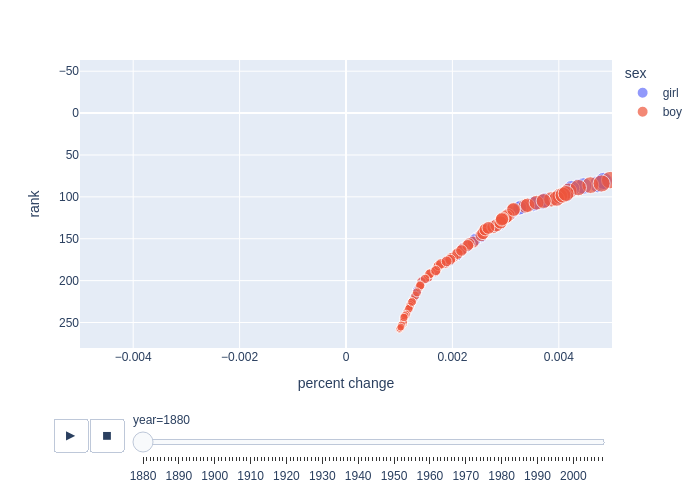

In [33]:
import pandas as pd
import plotly.express as px

# Load the data
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex'] 

# Rank names by prevalence within each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort the DataFrame
bn = bn.sort_values(['name', 'year'])

# Create the increase or decrease in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent'] 

# Sort by year and filter for common names
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # Restrict to "common" names

# Create the animated scatter plot
fig = px.scatter(
    bn,
    x='percent change',         # X-axis: Percent Change
    y='rank',                   # Y-axis: Rank
    animation_frame='year',     # Animation frame: Year
    animation_group='name',     # Animation group: Name
    size='percent',             # Size: Percent
    color='sex',                # Color: Sex
    hover_name='name',          # Hover name: Name
    size_max=50,                # Maximum size for points
    range_x=[-0.005, 0.005]    # X-axis range
)

# Reverse the Y-axis to put rank 1 on top
fig.update_yaxes(autorange='reversed')

# Show the figure as a PNG
fig.show(renderer="png")


**PART NINE: POST LECTURE**

Yes

**CHAT LOGS**

https://chatgpt.com/share/66f1ad00-be1c-800a-8561-cf2c7e980692